In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os, sys

In [5]:
os.chdir(r"C:\Users\ACER\Desktop\Terragon recruitment")

In [6]:
os.getcwd()

'C:\\Users\\ACER\\Desktop\\Terragon recruitment'

In [89]:
train_set = pd.read_csv(r"Train.csv")
test_set = pd.read_csv(r"Test.csv")

In [90]:
train_set.shape, test_set.shape

((8929, 18), (2233, 17))

In [91]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8929 entries, 0 to 8928
Data columns (total 18 columns):
customer_id    8929 non-null object
age            8929 non-null int64
job            8929 non-null object
marital        8929 non-null object
education      8929 non-null object
default        8929 non-null object
balance        8929 non-null int64
housing        8929 non-null object
loan           8929 non-null object
contact        8929 non-null object
day            8929 non-null int64
month          8929 non-null object
duration       8929 non-null int64
campaign       8929 non-null int64
pdays          8929 non-null int64
previous       8929 non-null int64
poutcome       8929 non-null object
deposit        8929 non-null int64
dtypes: int64(8), object(10)
memory usage: 1.2+ MB


In [92]:
train_set.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,RGD002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,RGD003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,RGD008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,RGD001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,RGD005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


In [93]:
train_set.keys()

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [94]:
num_check,count, sum_value = 0, True, 0
for key in train_set.keys():
    num_check = train_set[key].isnull()
    sum_value = sum(num_check)
    print (key, sum_value)

customer_id 0
age 0
job 0
marital 0
education 0
default 0
balance 0
housing 0
loan 0
contact 0
day 0
month 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
deposit 0


In [98]:
value, count, new_dict = {},1,{}

for key in train_set.keys():
    if key not in ['customer_id', 'age', 'balance', 'day', 'duration','campaign','pdays','deposit']:
        value = train_set[key].value_counts()
        for this in value.keys():
            new_dict[this] = count
            count += 1
        train_set[key] = train_set[key].map(new_dict)

train_set.head()


,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,RGD002844,31,1,13,17,20,81,23,24,26,29,36,164,2,-1,41,74,1
1,RGD003806,62,6,13,16,20,569,22,24,26,3,31,187,2,180,47,76,1
2,RGD008310,35,3,13,17,20,432,22,24,26,12,31,104,8,-1,41,74,0
3,RGD001840,43,1,13,17,20,1429,23,24,26,7,29,1030,1,169,44,76,1
4,RGD005881,29,2,13,18,20,25,23,24,27,4,32,188,2,-1,41,74,0


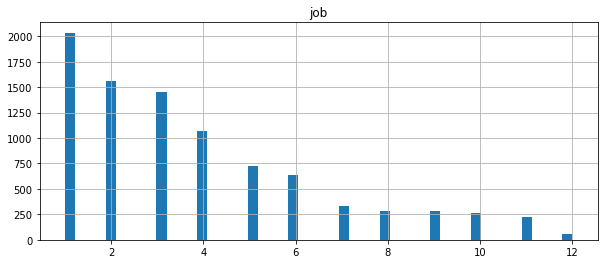

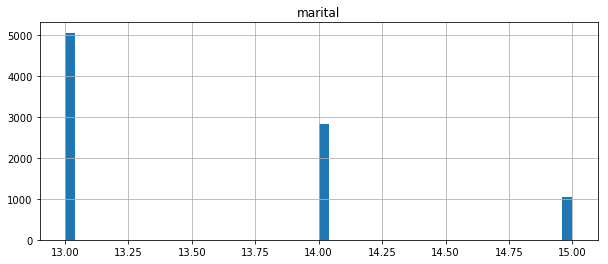

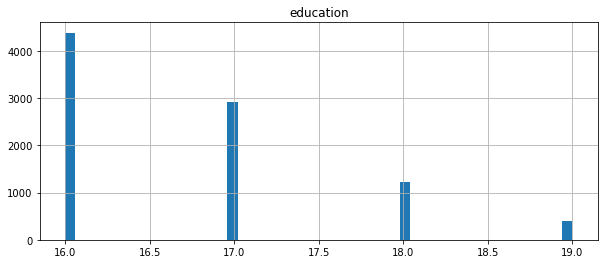

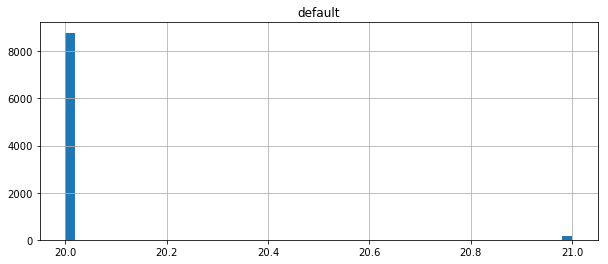

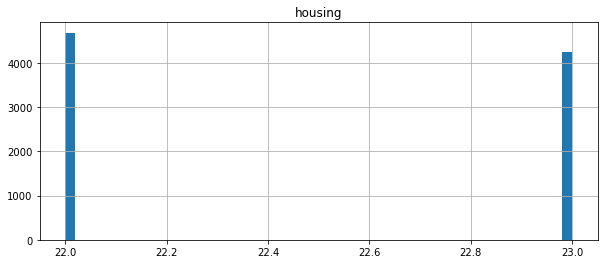

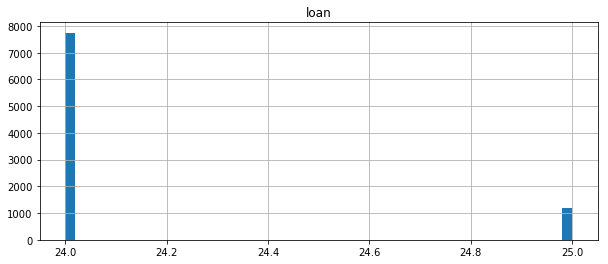

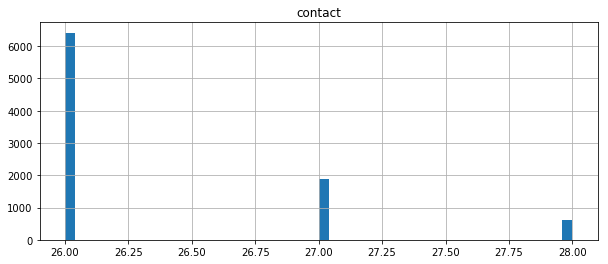

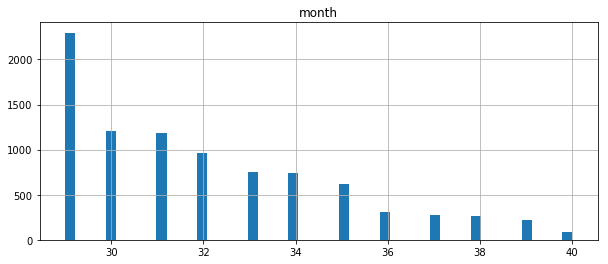

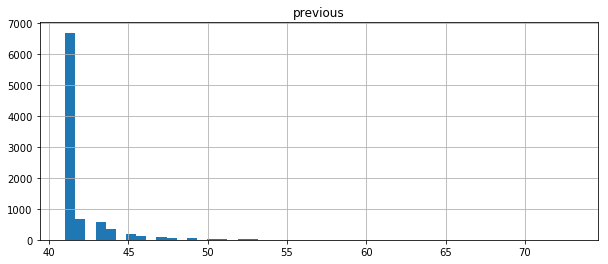

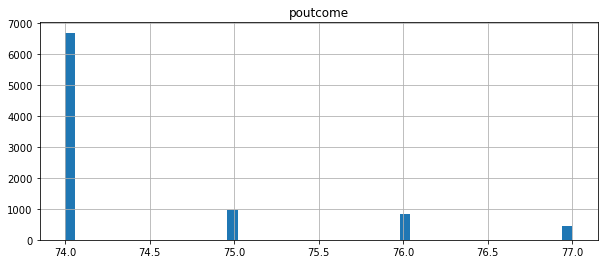

In [118]:
import matplotlib.pyplot as plt
for key in train_set.keys():
    if key not in ['customer_id', 'age', 'balance', 'day', 'duration','campaign','pdays','deposit']:
        train_set[key].hist(bins = 50 , figsize = (10, 4))
        plt.title(key)
        plt.show()
        plt.grid()
        plt.savefig(r"C:\Users\ACER\Desktop\Terragon recruitment")
        

In [128]:
preprocess_train = train_set
first_preprocess_train =preprocess_train.drop(['customer_id', 'deposit'], axis = 1)

In [129]:
first_preprocess_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,1,13,17,20,81,23,24,26,29,36,164,2,-1,41,74
1,62,6,13,16,20,569,22,24,26,3,31,187,2,180,47,76
2,35,3,13,17,20,432,22,24,26,12,31,104,8,-1,41,74
3,43,1,13,17,20,1429,23,24,26,7,29,1030,1,169,44,76
4,29,2,13,18,20,25,23,24,27,4,32,188,2,-1,41,74


In [130]:
import sklearn as sk

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [132]:
from sklearn.cross_validation import train_test_split

In [134]:
x = first_preprocess_train
y = train_set['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 18)

In [137]:
scale = MinMaxScaler()
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.fit_transform(x_test)

x_train_scale = scale.fit_transform(x_train_std)
x_test_scale = scale.fit_transform(x_test_std)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train_scale, y_train)
knn.score(x_train_scale, y_train),knn.score(x_test_scale, y_test)

(0.80050398992020155, 0.75027995520716684)

In [142]:
for n in [1,2,3,4,5,6,7,8,9,10]:
    knn =  KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_scale, y_train)
    print (knn.score(x_train_scale, y_train), "       ",knn.score(x_test_scale, y_test), "      ", n)

1.0         0.721164613662        1
0.839003219936         0.68868980963        2
0.857342853143         0.743561030235        3
0.804003919922         0.726763717805        4
0.820943581128         0.748600223964        5
0.784124317514         0.733482642777        6
0.80050398992         0.750279955207        7
0.772644547109         0.732362821948        8
0.782864342713         0.741321388578        9
0.766484670307         0.738521836506        10


In [145]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(knn, x_train_scale, y_train, cv = 10)
print (score)

[ 0.71048951  0.73706294  0.6951049   0.71608392  0.72408964  0.7605042
  0.71148459  0.74089636  0.73669468  0.72931276]


In [152]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test_scale)
accuracy_score(y_test, y_pred)

0.75027995520716684

In [166]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100)
lr.fit(x_train_scale, y_train)
lr.score(x_train_scale, y_train), lr.score(x_test_scale, y_test)

(0.79910401791964158, 0.80963045912653975)

In [156]:
for C in [0.00001,0.0001,0.001,0.01,0.1,1,1.0,10,100]:
    lr = LogisticRegression(C = C)
    lr.fit(x_train_scale, y_train)
    print (lr.score(x_train_scale, y_train), "     ", lr.score(x_test_scale, y_test), "     ", C)

0.551448971021       0.561590145577       1e-05
0.592328153437       0.601903695409       0.0001
0.678986420272       0.682530795073       0.001
0.705025899482       0.710526315789       0.01
0.77530449391       0.790593505039       0.1
0.794484110318       0.803471444569       1
0.794484110318       0.803471444569       1.0
0.798404031919       0.807390817469       10
0.79910401792       0.809630459127       100


In [167]:
score = cross_val_score(lr, x_train_scale, y_train, cv = 10)
print (score)

[ 0.79440559  0.82377622  0.80559441  0.78041958  0.79551821  0.79831933
  0.77871148  0.79691877  0.79971989  0.80224404]


In [168]:
y_pred = lr.predict(x_test_scale)
accuracy_score(y_test, y_pred)

0.80963045912653975

In [150]:
value, count, new_dict = {},1,{}

for key in test_set.keys():
    if key not in ['customer_id', 'age', 'balance', 'day', 'duration','campaign','pdays','deposit']:
        value = test_set[key].value_counts()
        for this in value.keys():
            new_dict[this] = count
            count += 1
        test_set[key] = test_set[key].map(new_dict)

test_set.head()


,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,RGD00718,38,1,13,17,20,179,22,24,27,8,30,317,4,-1,41,60
1,RGD0011005,31,2,13,16,20,1664,23,24,26,7,29,603,2,17,43,61
2,RGD008251,58,1,14,17,20,342,22,25,26,11,31,564,2,-1,41,60
3,RGD005377,40,8,13,16,20,1289,22,24,26,26,29,260,2,-1,41,60
4,RGD006892,46,4,13,16,20,1264,22,24,28,28,37,100,2,-1,41,60


In [175]:
preprocess_test = test_set
first_preprocess_test =preprocess_test.drop('customer_id', axis = 1)

In [212]:
first_preprocess_scale = scale.fit_transform(first_preprocess_test)
first_preprocess_scaled = std_scale.fit_transform(first_preprocess_scale)
first_preprocess_scaled

array([[-0.26097789, -1.01157752, -0.77273622, ..., -0.48334367,
        -0.41068195, -0.53477428],
       [-0.85485552, -0.64975587, -0.77273622, ..., -0.32003234,
         0.61682819,  0.63711087],
       [ 1.43581533, -1.01157752,  0.69080914, ..., -0.48334367,
        -0.41068195, -0.53477428],
       ..., 
       [-1.02453484,  1.52117408,  0.69080914, ...,  4.9966586 ,
         0.10307312,  0.63711087],
       [ 1.43581533, -1.01157752, -0.77273622, ...,  1.24049811,
         5.75437891,  1.80899601],
       [-0.6851762 , -0.64975587, -0.77273622, ...,  2.63771723,
         5.75437891,  2.98088115]])

In [213]:
lr_result =lr.predict(first_preprocess_test)
knn_result = knn.predict(first_preprocess_test)
knn_result.shape

(2233,)

In [214]:
dict_lr = {'customer_id': test_set['customer_id'], 'deposit': lr_result}
dict_knn = {'customer_id': test_set['customer_id'], 'deposit': knn_result}


to_pd_lr = pd.DataFrame(dict_lr)
to_pd_knn = pd.DataFrame(dict_knn)

to_pd_lr.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\logistic_submission1.csv")
to_pd_knn.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\knearest_submission1.csv")

In [215]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_scale, y_train)
sgd.score(x_train_scale, y_train),sgd.score(x_test_scale, y_test)
y_pred = sgd.predict(x_test_scale)
print (accuracy_score(y_test, y_pred))
sgd_result = sgd.predict(first_preprocess_test)
dict_sgd = {'customer_id': test_set['customer_id'], 'deposit': sgd_result}
to_pd_sgd = pd.DataFrame(dict_sgd)
to_pd_sgd.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\sgd_submission1.csv")

0.797872340426


In [216]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scale, y_train)
dtc.score(x_train_scale, y_train),dtc.score(x_test_scale, y_test)
y_pred = dtc.predict(x_test_scale)
print (accuracy_score(y_test, y_pred))
dtc_result = dtc.predict(first_preprocess_test)
dict_dtc = {'customer_id': test_set['customer_id'], 'deposit': dtc_result}
to_pd_dtc = pd.DataFrame(dict_dtc)
to_pd_dtc.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\dtc_submission1.csv")

0.734602463606


In [217]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train_scale, y_train)
rand.score(x_train_scale, y_train),rand.score(x_test_scale, y_test)
y_pred = rand.predict(x_test_scale)
print (accuracy_score(y_test, y_pred))
rand_result = rand.predict(first_preprocess_test)
dict_rand = {'customer_id': test_set['customer_id'], 'deposit': rand_result}
to_pd_rand = pd.DataFrame(dict_rand)
to_pd_dtc.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\rand_submission1.csv")

0.791713325868


In [218]:
from sklearn.ensemble import GradientBoostingClassifier
for i in range(1,11):
    gbrt = GradientBoostingClassifier(random_state = 1, max_depth = i, learning_rate = 1)
    gbrt.fit(x_train_scale, y_train)
    gbrt.score(x_train_scale, y_train),gbrt.score(x_test_scale, y_test)
    y_pred = gbrt.predict(x_test_scale)
    print (i, "      ",accuracy_score(y_test, y_pred))
    gbrt_result = gbrt.predict(first_preprocess_test)
    dict_gbrt = {'customer_id': test_set['customer_id'], 'deposit': gbrt_result}
    #to_pd_gbrt = pd.DataFrame(dict_gbrt)
    #to_pd_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\gbrt_submission1.csv")

1        0.832586786114
2        0.804031354983
3        0.776595744681
4        0.773796192609
5        0.774916013438
6        0.776035834267
7        0.79843225084
8        0.80235162374
9        0.78555431131
10        0.802911534155


In [219]:
gbrt = GradientBoostingClassifier(random_state = 1, max_depth = 1, learning_rate = 1)
gbrt.fit(x_train_scale, y_train)
print (gbrt.score(x_train_scale, y_train),gbrt.score(x_test_scale, y_test))
y_pred = gbrt.predict(x_test_scale)
accuracy_score(y_test, y_pred)
gbrt_result = gbrt.predict(first_preprocess_test)
dict_gbrt = {'customer_id': test_set['customer_id'], 'deposit': gbrt_result}
to_pd_gbrt = pd.DataFrame(dict_gbrt)
to_pd_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\gbrt_submission1.csv")

0.843623127537 0.832586786114


In [220]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
mse

0.16741321388577829

In [221]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_scale, y_train)
ada.score(x_train_scale, y_train),ada.score(x_test_scale, y_test)
y_pred = ada.predict(x_test_scale)
print (accuracy_score(y_test, y_pred))
ada_result = ada.predict(first_preprocess_test)
dict_ada = {'customer_id': test_set['customer_id'], 'deposit': ada_result}
to_pd_ada = pd.DataFrame(dict_ada)
to_pd_ada.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\ada_submission1.csv")

0.826427771557


In [222]:
x_train_scale.shape

(7143, 16)

In [223]:
# training a new network from scratch using 4 epochs
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (7143,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train_scale, y_train, epochs = 10, batch_size = 512)
results = model.evaluate(x_test_scale, y_test)
results

ValueError: Error when checking input: expected dense_10_input to have shape (7143,) but got array with shape (16,)